# Main Simulation

In [173]:
import random
import numpy as np
from matplotlib import pyplot as plt
import os
from datetime import date
import yfinance as yf   
from scipy.stats import norm




def sim(stock_price,total_days,seed_pc):
    initial_stock_price=stock_price
    pc_mean=np.mean(seed_pc)
    pc_stdev=np.std(seed_pc)
    
    initial_stocks=0
    total_stocks=initial_stocks
    cost=0
    price_history=np.zeros(total_days)
    days=np.arange(0,total_days,1)
    
    seed_pc_count=len(seed_pc)
    pc_evolved=list(seed_pc)
    #moving_average=np.zeros(total_days)
    
    n=1
    for i in range(total_days):
        percentage_change=np.random.normal(pc_mean,pc_stdev,1)[0]
        pc_evolved.append(percentage_change)
        stock_price=stock_price+(stock_price*percentage_change*0.01)
        price_history[i]=stock_price
        #print(f"Day: {i} Stock Price is {stock_price}")
        if percentage_change<-5:
            '''Trading strategy
            '''
            buy=3
            cost=cost+buy*stock_price
            total_stocks+=3
    
        n+=1
        #pc_mean=(pc_mean*(seed_pc_count+i)+cumulative_pc[i])/(seed_pc_count+i+1)
        pc_mean=np.mean(pc_evolved)
        pc_stdev=np.std(pc_evolved)
    
        #print("New Percentage Change Average:",pc_mean)
    profit=(total_stocks*stock_price)-cost
    return profit, pc_evolved, price_history

Today's Date is:  2023-01-17
[*********************100%***********************]  1 of 1 completed
Mean fluctuation is 0.11633547296647037
Median fluctuation is 0.11751937286338603
Standarad Deviation of the fluctuation is 1.6134289256625396


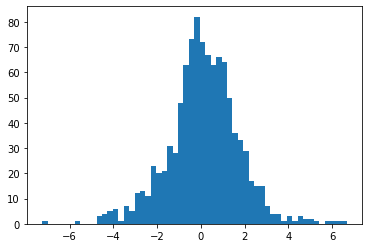

In [174]:
#pc_mean=-0.2867826682796331
#pc_stdev=3.479385394676354
#latest_stock_price=10

days_to_simulate=200


today = str(date.today())
print("Today's Date is: ",today)

ticker="AAPL"
starting_date='2019-01-01'
data = yf.download(ticker,starting_date,today) 

x=np.array(data.Close)
y=np.array(data.Open)
latest_stock_price=x[-1]

delta=data.Close-data.Open

pc=(np.array(delta)/data.Open)*100
seed_pc=pc

bin=3.49*np.std(pc)*(len(pc)**(1/3))
counts, bins, bars=plt.hist(pc,int(bin))

pc_mean=np.mean(pc)
pc_stdev=np.std(pc)
pc_median=np.median(pc)

pc_mean_std_sample_count=len(pc)
print("Mean fluctuation is",pc_mean)
print("Median fluctuation is",pc_median)
print("Standarad Deviation of the fluctuation is",pc_stdev)


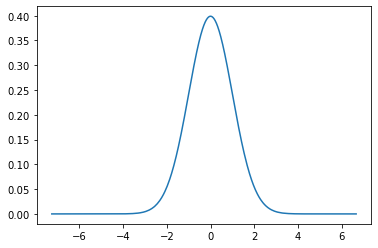

In [171]:
plt.plot(np.sort(pc), norm.pdf(np.sort(pc)))


Positive Profits: 0
Negative Profits: 10
Mean profit: -9.81597479893718
Standard Deviatin of profits: 20.162827248710432
Highest Profit: 0.0
Lowest Profit: -66.6362671245077


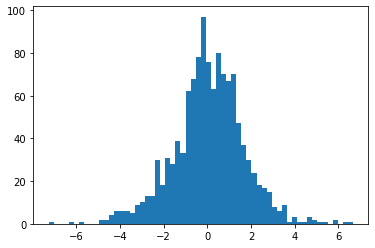

In [210]:
n=10
positive_profits_count=0
profits=np.zeros(n)
pc_evolved=np.zeros(n)
price_history=np.zeros(n)
price_history=price_history.tolist()
pc_evolved=pc_evolved.tolist()

for i in range(n):
    profits[i], pc_e, stock_price=sim(latest_stock_price,days_to_simulate,seed_pc)
    pc_evolved[i]=pc_e
    price_history[i]=stock_price
    if profits[i]>0:
        positive_profits_count+=1

print("Positive Profits:",positive_profits_count)
print("Negative Profits:",n-positive_profits_count)
print("Mean profit:",np.mean(profits))
print("Standard Deviatin of profits:",np.std(profits))
print("Highest Profit:",np.max(profits))
print("Lowest Profit:",np.min(profits))
#n,bins,edges=plt.hist(profits,bins=10)


bin=3.49*np.std(pc_evolved[-1])*(len(pc_evolved[-1])**(1/3))
counts, bins, bars=plt.hist(pc_evolved[-1],int(bin))

0.0


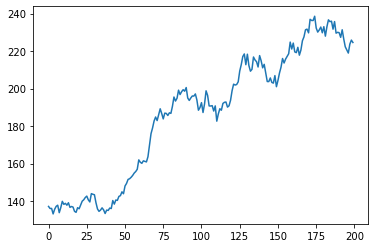

In [179]:
   plt.plot(np.arange(0,len(price_history[-1]),1),price_history[-1])
   print(profits[-1])


In [ ]:
a=[0,4,6,230]
mn=np.mean(a)
print("old mean is",mn)
new_data=10
new_mn=(mn+new_data)/2
print("This is calculated new mean",new_mn)
a.append(new_data)
print(a)
print("Ture new mean is: ",np.mean(a))
